In [95]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline 
#this line above prepares IPython notebook for working with matplotlib

# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

In [88]:
titanic = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')

titanic.Cabin.fillna('U',inplace=True)    
# mapping each Cabin value with the cabin letter
titanic['Cabin'] = titanic['Cabin'].map(lambda c : c[0])    
# dummy encoding ...
cabin_dummies = pd.get_dummies(titanic['Cabin'],prefix='Cabin')

titanic = pd.concat([titanic,cabin_dummies],axis=1)
titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,U,Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [94]:
def fill_age(df):
    df.Age[(df.Sex == 'male') & (df.Pclass == 3) & (df.Parch==0)]=26.0
#fill_age(titanic)
titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,3,"Braund, Mr. Owen Harris",male,26.0,1,0,A/5 21171,7.2500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,26.0,0,0,373450,8.0500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,U,Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
values =titanic.groupby(['Sex', 'Pclass','Parch']).Age.median()
values

Sex     Pclass  Parch
female  1       0        35.0
                1        41.5
                2        22.0
        2       0        30.0
                1        25.0
                2        22.0
                3        39.0
        3       0        22.0
                1         9.0
                2         9.5
                3        36.0
                4        37.0
                5        39.0
                6        43.0
male    1       0        42.0
                1        43.5
                2        18.0
                4        64.0
        2       0        31.0
                1        13.5
                2        25.0
        3       0        26.0
                1        14.0
                2         9.0
                3        16.0
                4        40.0
                5        39.0
Name: Age, dtype: float64

In [87]:
#fill_age(titanic)
#titanic.Age[(titanic.Sex == 'male') & (titanic.Pclass == 3) & (titanic.Parch==0)]=26
#titanic.head(6)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,3,"Braund, Mr. Owen Harris",male,26.0,1,0,A/5 21171,7.2500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,26.0,0,0,373450,8.0500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,U,Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [63]:
print titanic[titanic.Age.isnull()].groupby('Pclass').Pclass.count()
print titanic[titanic.Age.isnull()].groupby('Sex').Sex.count()
print titanic[titanic.Age.isnull()].groupby('Parch').Parch.count()
print titanic.groupby(['Sex', 'Parch']).Age.median()
print titanic.groupby(['Sex', 'Parch']).Age.median().median()

print titanic.groupby(['Sex', 'Pclass']).Age.median()
print titanic.groupby(['Sex', 'Pclass']).Age.median().median()
print titanic.groupby(['Sex', 'Pclass','Parch']).Age.median()
print titanic.groupby(['Sex', 'Pclass','Parch']).Age.median().median()

Pclass
1     30
2     11
3    136
Name: Pclass, dtype: int64
Sex
female     53
male      124
Name: Sex, dtype: int64
Parch
0    157
1      8
2     12
Name: Parch, dtype: int64
Sex     Parch
female  0        29.0
        1        26.0
        2        18.0
        3        36.0
        4        37.0
        5        39.0
        6        43.0
male    0        30.0
        1        19.0
        2        10.5
        3        16.0
        4        52.0
        5        39.0
Name: Age, dtype: float64
30.0
Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64
29.0
Sex     Pclass  Parch
female  1       0        35.0
                1        41.5
                2        22.0
        2       0        30.0
                1        25.0
                2        22.0
                3        39.0
        3       0        22.0
                1         9.0
                2

In [93]:
print titanic_test.groupby(['Sex', 'Pclass','Parch']).Age.median()


Sex     Pclass  Parch
female  1       0        37.0
                1        46.5
                2        28.0
                3        48.0
                4        60.0
        2       0        26.0
                1        19.0
                2        24.0
                3        36.0
        3       0        23.0
                1        12.5
                2        33.0
                4         NaN
                9         NaN
male    1       0        42.0
                1        50.0
                2        13.0
                3        61.0
        2       0        28.0
                1        30.0
                2        28.5
        3       0        25.0
                1         8.0
                2        13.0
                5        40.0
                6        40.0
                9         NaN
Name: Age, dtype: float64


In [33]:
cabin_values=cabin_dummies.columns.values
cabin_values

array(['Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U'], dtype=object)

In [34]:
titanic.groupby(['Sex', 'Pclass']).Age.median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [35]:
titanic.Age.median()

28.0

In [36]:
titanic[titanic.Age==np.nan]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U


In [ ]:
titanic.plot().scatter

In [24]:
titanic['Age']=titanic.Age.fillna(titanic['Age'].median())

In [25]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1258]:
titanic.loc[titanic['Sex']=='male', 'Sex']=0
titanic.loc[titanic['Sex']=='female', 'Sex']=1

In [1259]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1260]:
pd.value_counts(titanic.Cabin.str[:1])

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [1261]:
titanic['Embarked'].fillna('S', inplace=True)

In [1262]:
dummies = pd.get_dummies(titanic.Embarked)
titanic[titanic.Embarked.unique()] = dummies
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [1263]:
#titanic.loc[titanic['Embarked']=='S', 'Embarked']=0
#titanic.loc[titanic['Embarked']=='C', 'Embarked']=1
#titanic.loc[titanic['Embarked']=='Q', 'Embarked']=2

In [1264]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,S,C,Q
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [1265]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold

In [1266]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C','S','Q']

In [1267]:
alg = LinearRegression()

In [1268]:
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)
predictions = []

In [1269]:
for train, test in kf:
    train_predictors = (titanic[predictors].iloc[train, :])
    train_target = titanic['Survived'].iloc[train]
    alg.fit(train_predictors, train_target)
    test_predictions = alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)
    

In [1270]:
for i in predictions:
    print(len(i))

297
297
297


In [1271]:
predictions = np.concatenate(predictions, axis=0)

In [1272]:
predictions[predictions>.5]=1
predictions[predictions<=.5]=0

In [1273]:
accuracy=(np.sum(predictions == titanic['Survived'])/float(len(titanic['Survived'])))

In [1274]:
np.sum(predictions == titanic['Survived'])

702

In [1275]:
len(titanic['Survived'])

891

In [1276]:
accuracy

0.78787878787878785

In [1277]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression

In [1278]:
alg = LogisticRegression(random_state=1)

In [1279]:
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv=3)

In [1280]:
scores

array([ 0.79124579,  0.78451178,  0.79124579])

In [1281]:
print scores.mean()

0.789001122334


In [1286]:
titanic_test = pd.read_csv('test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1287]:
titanic_test = pd.read_csv("test.csv")
titanic_test["Age"] = titanic_test["Age"].fillna(titanic["Age"].median())
titanic_test["Fare"] = titanic_test["Fare"].fillna(titanic_test["Fare"].median())
titanic_test.loc[titanic_test["Sex"] == "male", "Sex"] = 0 
titanic_test.loc[titanic_test["Sex"] == "female", "Sex"] = 1
titanic_test["Embarked"] = titanic_test["Embarked"].fillna("S")

titanic_test.Cabin.fillna('U',inplace=True)
titanic_test['Cabin'] = titanic_test['Cabin'].map(lambda c : c[0])    
# dummy encoding ...
cabin_dummies = pd.get_dummies(titanic_test['Cabin'],prefix='Cabin')
titanic_test = pd.concat([titanic_test,cabin_dummies],axis=1)

dummies = pd.get_dummies(titanic_test.Embarked)
titanic_test[titanic_test.Embarked.unique()] = dummies
col_to_add = np.setdiff1d(titanic.columns, titanic_test.columns)
#titanic_test.loc[titanic_test["Embarked"] == "S", "Embarked"] = 0
#titanic_test.loc[titanic_test["Embarked"] == "C", "Embarked"] = 1
#titanic_test.loc[titanic_test["Embarked"] == "Q", "Embarked"] = 2

In [1288]:
alg = LogisticRegression(random_state=1)
alg.fit(titanic[predictors], titanic['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1289]:
predictions = alg.predict(titanic_test[predictors])

In [1290]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0,

In [1295]:
predictors = np.append(["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "S","C","Q"],cabin_values)

In [1296]:
from sklearn.ensemble import RandomForestClassifier

In [1297]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)

In [1298]:
alg

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [1299]:
alg.fit(titanic[predictors], titanic['Survived'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [1300]:
kFold = KFold(titanic.shape[0], random_state=1, n_folds=3)
scores=cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv=kFold)
kFold2 = KFold(titanic.shape[0], random_state=1, n_folds=6)
scores2=cross_validation.cross_val_score(alg, titanic[predictors], titanic['Survived'], cv=kFold2)

In [1301]:
scores=scores.mean()

In [1302]:
scores

0.81818181818181823

In [1303]:
scores2.mean()

0.82492139790797514

In [1304]:
titanic['FamilySize']=titanic['SibSp']+titanic['Parch']
titanic['NameLength']=titanic['Name'].apply(lambda x:len(x))

In [1305]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,S,C,Q,FamilySize,NameLength
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,21
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,B,S,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,28
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.45,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,40
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,C,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,21
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,U,Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,19


In [1306]:
import re

In [1307]:
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ''

titles = titanic.Name.apply(get_title)
print pd.value_counts(titles)
print pd.value_counts(titles).value_counts
type(titles)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64
<bound method Series.value_counts of Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64>


pandas.core.series.Series

In [1308]:
titles_dict = pd.value_counts(titles).to_dict()

In [1309]:
titles_dict.items()

[('Sir', 1),
 ('Major', 2),
 ('Don', 1),
 ('Mlle', 2),
 ('Capt', 1),
 ('Miss', 182),
 ('Lady', 1),
 ('Rev', 6),
 ('Mrs', 125),
 ('Mme', 1),
 ('Countess', 1),
 ('Master', 40),
 ('Ms', 1),
 ('Mr', 517),
 ('Jonkheer', 1),
 ('Dr', 7),
 ('Col', 2)]

In [1310]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in title_mapping.items():
    titles[titles == k] = k

In [1311]:
titanic['Title']=titles


In [1312]:
dummies = pd.get_dummies(titanic.Title)
titanic[titanic.Title.unique()] = dummies
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,S,C,Q,FamilySize,NameLength,Title,Mr,Mrs,Miss,Master,Don,Rev,Dr,Mme,Ms,Major,Lady,Sir,Mlle,Col,Capt,Countess,Jonkheer
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,23,Mr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,51,Mrs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,22,Miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,44,Mrs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,24,Mr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1313]:
title_values=titles.unique()
title_values

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [1314]:
import operator

# A dictionary mapping family name to id
family_id_mapping = {}

# A function to get the id given a row
def get_family_id(row):
    # Find the last name by splitting on a comma
    last_name = row["Name"].split(",")[0]
    # Create the family id
    family_id = "{0}{1}".format(last_name, row["FamilySize"])
    # Look up the id in the mapping
    if family_id not in family_id_mapping:
        if len(family_id_mapping) == 0:
            current_id = 1
        else:
            # Get the maximum id from the mapping and add one to it if we don't have an id
            current_id = (max(family_id_mapping.items(), key=operator.itemgetter(1))[1] + 1)
        family_id_mapping[family_id] = current_id
    return family_id_mapping[family_id]

# Get the family ids with the apply method
family_ids = titanic.apply(get_family_id, axis=1)

# There are a lot of family ids, so we'll compress all of the families under 3 members into one code.
family_ids[titanic["FamilySize"] < 3] = -1

# Print the count of each unique id.
print(pd.value_counts(family_ids))

titanic["FamilyId"] = family_ids

-1      800
 14       8
 149      7
 63       6
 50       6
 59       6
 17       5
 384      4
 27       4
 25       4
 162      4
 8        4
 84       4
 340      4
 43       3
 269      3
 58       3
 633      2
 167      2
 280      2
 510      2
 90       2
 83       1
 625      1
 376      1
 449      1
 498      1
 588      1
dtype: int64


In [1323]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(titanic, titanic['Survived'], test_size=0.25, random_state=0)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)
xtrain.head()

(668, 45)
(223, 45)
(668L,)
(223L,)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,S,C,Q,FamilySize,NameLength,Title,Mr,Mrs,Miss,Master,Don,Rev,Dr,Mme,Ms,Major,Lady,Sir,Mlle,Col,Capt,Countess,Jonkheer,FamilyId
105,106,0,3,"Mionoff, Mr. Stoytcho",0,28.0,0,0,349207,7.8958,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,21,Mr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1
68,69,1,3,"Andersson, Miss. Erna Alexandra",1,17.0,4,2,3101281,7.9250,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6,31,Miss,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
253,254,0,3,"Lobb, Mr. William Arthur",0,30.0,1,0,A/5. 3336,16.1000,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,24,Mr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1
320,321,0,3,"Dennis, Mr. Samuel",0,22.0,0,0,A/5 21172,7.2500,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,18,Mr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",1,45.0,0,0,223596,13.5000,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,29,Mrs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1


In [1324]:
predictors = np.append(np.append(["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "S","C","Q", "FamilySize",  "FamilyId", "NameLength"],cabin_values), title_values)

predictors

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'S', 'C', 'Q',
       'FamilySize', 'FamilyId', 'NameLength', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_U', 'Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme',
       'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [1325]:
selector = SelectKBest(f_classif, k=5)
selector.fit(xtrain[predictors], ytrain)

C:\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [22 24 26] are constant.
  UserWarning)


SelectKBest(k=5, score_func=<function f_classif at 0x000000000BCF92E8>)

In [1326]:
scores = -np.log10(selector.pvalues_)

In [1327]:
scores

array([  1.73059085e+01,   5.29092394e+01,   1.13761960e+00,
         7.06212810e-01,   1.45572775e+00,   8.62598774e+00,
         3.89474065e+00,   8.68850214e-02,   3.23631863e+00,
         5.04205640e-02,   9.32322576e-01,   1.96154939e+01,
         1.29182507e-01,   5.20844697e+00,   1.77856516e+00,
         2.97888173e+00,   4.63462969e+00,   1.08547745e+00,
         1.30104826e-01,   3.68520897e-01,   1.46257959e+01,
         3.68520897e-01,              nan,   6.82587461e-01,
                    nan,   7.02295320e-02,              nan,
         6.82587461e-01,   1.30104826e-01,   1.66149963e+00,
         1.63038962e+01,   1.12851658e+00,   6.82587461e-01,
         5.65555069e+01,   2.06629510e+01,   6.82587461e-01,
         7.72148127e-01,   6.82587461e-01])

In [1328]:
selector.scores_

array([  7.93398813e+01,   2.85932619e+02,   3.22800690e+00,
         1.67010837e+00,   4.46259283e+00,   3.66455996e+01,
         1.48536967e+01,   5.25930414e-02,   1.19528808e+01,
         1.90069328e-02,   2.46526385e+00,   9.12015724e+01,
         1.07851348e-01,   2.07614737e+01,   5.76189716e+00,
         1.08327665e+01,   1.81639391e+01,   3.03130821e+00,
         1.09225700e-01,   6.28918203e-01,   6.58339990e+01,
         6.28918203e-01,              nan,   1.59055430e+00,
                    nan,   3.54619506e-02,              nan,
         1.59055430e+00,   1.09225700e-01,   5.28631989e+00,
         7.42577536e+01,   3.19353481e+00,   1.59055430e+00,
         3.10156987e+02,   9.66488732e+01,   1.59055430e+00,
         1.89602613e+00,   1.59055430e+00])

In [1329]:
selector.pvalues_

array([  4.94414855e-18,   1.23242542e-53,   7.28417544e-02,
         1.96692224e-01,   3.50164611e-02,   2.36598648e-09,
         1.27426382e-04,   8.18681504e-01,   5.80338487e-04,
         8.90388282e-01,   1.16863106e-01,   2.42385217e-20,
         7.42706958e-01,   6.18803876e-06,   1.66507898e-02,
         1.04982828e-03,   2.31937148e-05,   8.21339197e-02,
         7.41131333e-01,   4.28034824e-01,   2.36703172e-15,
         4.28034824e-01,              nan,   2.07688543e-01,
                    nan,   8.50688316e-01,              nan,
         2.07688543e-01,   7.41131333e-01,   2.18022024e-02,
         4.96711023e-17,   7.43846663e-02,   2.07688543e-01,
         2.78287106e-57,   2.17294636e-21,   2.07688543e-01,
         1.68986446e-01,   2.07688543e-01])

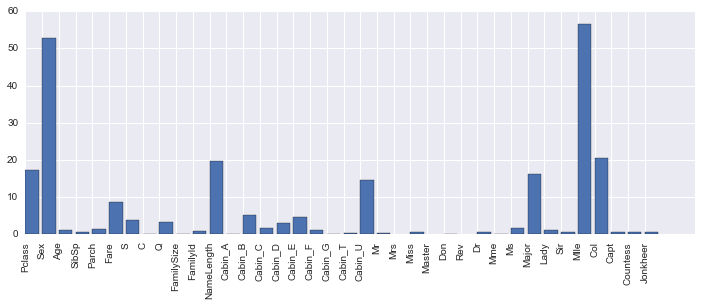

In [1330]:
plt.bar(range(len(predictors)), scores)
plt.xticks(range((len(predictors))), predictors, rotation='vertical')
plt.show()

In [1331]:
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)

In [1332]:
from sklearn.ensemble import GradientBoostingClassifier

# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), np.append(np.append(["Pclass", "Sex", "Age", "Fare", "S","C","Q","FamilySize", "FamilyId"],cabin_values), title_values)],
    [LogisticRegression(random_state=1), np.append(np.append(["Pclass", "Sex", "Fare", "FamilySize","Age","S","C","Q"],cabin_values),title_values)]
]

# Initialize the cross validation folds
kf = KFold(xtrain.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = ytrain.iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(xtrain[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(xtrain[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions == ytrain) / float(len(predictions))
print(accuracy)
sum(predictions==ytrain)

0.830838323353


555

In [1333]:
# First, we'll add titles to the test set.
titles = titanic_test["Name"].apply(get_title)
# We're adding the Dona title to the mapping, because it's in the test set, but not the training set
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}
for k,v in title_mapping.items():
    titles[titles == k] = k
titanic_test["Title"] = titles
dummies = pd.get_dummies(titanic_test.Title)
titanic_test[titanic_test.Title.unique()] = dummies


# Check the counts of each unique title.
print(pd.value_counts(titanic_test["Title"]))

# Now, we add the family size column.
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]

# Now we can add family ids.
# We'll use the same ids that we did earlier.
print(family_id_mapping)

family_ids = titanic_test.apply(get_family_id, axis=1)
family_ids[titanic_test["FamilySize"] < 3] = -1
titanic_test["FamilyId"] = family_ids
titanic_test["NameLength"] = titanic_test["Name"].apply(lambda x: len(x))
col_to_add = np.setdiff1d(titanic.columns, titanic_test.columns)
for c in col_to_add:
    titanic_test[c] = 0
titanic_test = titanic_test[titanic.columns]

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64
{"O'Sullivan0": 426, 'Mangan0': 620, 'Lindqvist1': 543, 'Denkoff0': 297, 'Rouse0': 413, 'Berglund0': 207, 'Meo0': 142, 'Arnold-Franchi1': 49, 'Chronopoulos1': 71, 'Skoog5': 63, 'Widener2': 329, 'Pengelly0': 217, 'Goncalves0': 400, 'Myhrman0': 626, 'Beane1': 456, 'Moss0': 104, 'Carlsson0': 610, 'Nicholls2': 136, 'Jussila1': 110, 'Jussila0': 483, 'Long0': 632, 'Wheadon0': 33, 'Connolly0': 261, 'Hansen2': 680, 'Stephenson1': 493, 'Davies0': 336, 'Silven2': 359, 'Vanden Steen0': 311, 'Astor1': 571, 'Patchett0': 480, 'Johanson0': 184, 'Coleridge0': 220, 'Christmann0': 87, 'Carter3': 340, 'Compton2': 665, 'Carter1': 226, 'Turkula0': 414, 'Hassab0': 558, 'Saad0': 566, 'Mellors0': 208, 'Mamee0': 36, 'Madsen0': 119, 'Anderson0': 395, 'Kraeff0': 42, 'Robbins0': 468, 'Lundahl0': 522, 'Gilinski0': 490, 'Porter0': 107, 'Sdycoff0': 352, 'Green0': 204

In [1334]:
# First, we'll add titles to the test set.
titles = xtest["Name"].apply(get_title)
# We're adding the Dona title to the mapping, because it's in the test set, but not the training set
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}
for k,v in title_mapping.items():
    titles[titles == k] = k
xtest["Title"] = titles

dummies = pd.get_dummies(xtest.Title)
xtest[xtest.Title.unique()] = dummies
col_to_add = np.setdiff1d(titanic.columns, titanic_test.columns)
# Check the counts of each unique title.
print(pd.value_counts(xtest["Title"]))

# Now, we add the family size column.
xtest["FamilySize"] = xtest["SibSp"] + xtest["Parch"]

# Now we can add family ids.
# We'll use the same ids that we did earlier.
print(family_id_mapping)

family_ids = titanic_test.apply(get_family_id, axis=1)
family_ids[xtest["FamilySize"] < 3] = -1
xtest["FamilyId"] = family_ids
xtest["NameLength"] = xtest["Name"].apply(lambda x: len(x))
col_to_add = np.setdiff1d(titanic.columns, titanic_test.columns)
for c in col_to_add:
    test[c] = 0
xtest = xtest[xtrain.columns]

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Mr          123
Miss         50
Mrs          32
Master        7
Dr            4
Rev           3
Col           2
Jonkheer      1
Don           1
Name: Title, dtype: int64
{"O'Sullivan0": 426, 'Mangan0': 620, 'Lindqvist1': 543, 'Denkoff0': 297, 'Sincock0': 813, 'Rouse0': 413, 'Berglund0': 207, 'Meo0': 142, 'Arnold-Franchi1': 49, 'Chronopoulos1': 71, 'Skoog5': 63, 'Walcroft0': 897, 'Widener2': 329, 'Pengelly0': 217, 'Goncalves0': 400, 'Andersen0': 829, 'Myhrman0': 626, 'Beane1': 456, 'Moss0': 104, 'Carlsson0': 610, 'Nicholls2': 136, 'Jussila1': 110, 'Jussila0': 483, 'Peltomaki0': 725, 'Long0': 632, 'Cassebeer0': 809, 'Portaluppi0': 858, 'Wheadon0': 33, 'Connolly0': 261, 'Hansen2': 680, 'Stephenson1': 493, 'Howard0': 862, 'Smyth0': 805, 'Davies0': 336, 'Silven2': 359, 'Vanden Steen0': 311, 'Sadowitz0': 878, 'Astor1': 571, 'Patchett0': 480, 'Denbury0': 891, 'Johanson0': 184, 'Coleridge0': 220, 'Christmann0': 87, 'Carter3': 340, 'Compton2': 665, 'Carter1': 226, 'Turkula0': 414, 'Lindeberg-Li

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


IndexingError: Unalignable boolean Series key provided

In [1335]:
titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,S,C,Q,FamilySize,NameLength,Title,Mr,Mrs,Miss,Master,Don,Rev,Dr,Mme,Ms,Major,Lady,Sir,Mlle,Col,Capt,Countess,Jonkheer,FamilyId
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,U,Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0,16,Mr,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,1.0,0,0,0,-1
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,1,32,Mrs,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0,0,0,0.0,0,0,0,-1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,U,Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,0,25,Mr,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,1.0,0,0,0,-1
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,0,16,Mr,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,1.0,0,0,0,-1
4,896,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,U,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,1.0,0.0,2,44,Mrs,0.0,0.0,0.0,0.0,0,1.0,0.0,0,0.0,0,0,0,0,0.0,0,0,0,-1


In [1364]:
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV  
predictors = np.append(np.append(["Pclass", "Sex", "Age", "Fare", "S","C","Q", "FamilySize", "FamilyId"],cabin_values), title_values)

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1), np.append(np.append(["Pclass", "Sex", "Fare", "FamilySize", "Age", "S","C","Q"], cabin_values), title_values)]
]

full_predictions = []
full_predictions_test = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(xtrain[predictors], ytrain)
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)
    
    predictions_test = alg.predict_proba(xtest[predictors].astype(float))[:,1]
    full_predictions_test.append(predictions_test)
    

# The gradient boosting classifier generates better predictions, so we weight it higher.
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions[predictions <= .5] = 0
predictions[predictions > .5] = 1
predictions = predictions.astype(int)

predictions_test = (full_predictions_train[0] * 3 + full_predictions_train[1]) / 4
predictions_test[full_predictions_train[0] <= .5] = 0
predictions_test[full_predictions_train[0] > .5] = 1
#predictions_train = predictions_train.astype(int)
accuracy = sum(predictions_test == ytest) / float(len(predictions_train))
print(accuracy)
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('titanic2.csv', index=False)

0.820627802691


In [1337]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,4

Accuracy : 0.9087
AUC Score (Train): 0.958674
CV Score : Mean - 0.8667816 | Std - 0.01592941 | Min - 0.8476782 | Max - 0.8887195


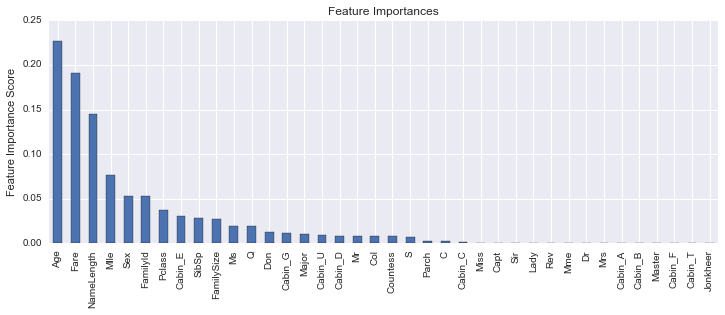

In [1339]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    alg.fit(dtrain[predictors], dtrain['Survived'])
    
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Survived'], cv = cv_folds, scoring='roc_auc')
    
    print 'Accuracy : %.4g' % metrics.accuracy_score(dtrain['Survived'].values, dtrain_predictions)
    print 'AUC Score (Train): %f' % metrics.roc_auc_score(dtrain['Survived'], dtrain_predprob)
    
    if performCV:
        print 'CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g' % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score))
        
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        
        
predictors = np.append(np.append(["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "S","C","Q", "FamilySize", "FamilyId", "NameLength"],cabin_values), title_values)
gbm= GradientBoostingClassifier(random_state=1)
modelfit(gbm, xtrain, predictors)
    

In [1340]:
param_test1 = {'n_estimators':range(20,81,10)}

In [1341]:
gsearch1 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, min_samples_split=6, min_samples_leaf=3, max_depth=5, max_features='sqrt', subsample=0.8, random_state=1),
                       param_grid = param_test1,scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch1.fit(xtrain[predictors], ytrain)
                                                             

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=3,
              min_samples_split=6, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=1,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [1342]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.86568, std: 0.02330, params: {'n_estimators': 20},
  mean: 0.86879, std: 0.02464, params: {'n_estimators': 30},
  mean: 0.86853, std: 0.02554, params: {'n_estimators': 40},
  mean: 0.86526, std: 0.02098, params: {'n_estimators': 50},
  mean: 0.86515, std: 0.01986, params: {'n_estimators': 60},
  mean: 0.86501, std: 0.01885, params: {'n_estimators': 70},
  mean: 0.86072, std: 0.01969, params: {'n_estimators': 80}],
 {'n_estimators': 30},
 0.8687934554684913)

In [1343]:
param_test2 = {'max_depth':range(3,12,1), 'min_samples_split':range(2,10,2)}
est = GradientBoostingClassifier(learning_rate=0.1, n_estimators=30, subsample=0.8, max_features='sqrt',random_state=1)
gsearch2 = GridSearchCV(estimator=est, param_grid=param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(xtrain[predictors], ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=30, presort='auto', random_state=1,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_split': [2, 4, 6, 8], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [1344]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.86047, std: 0.02477, params: {'min_samples_split': 2, 'max_depth': 3},
  mean: 0.86116, std: 0.02567, params: {'min_samples_split': 4, 'max_depth': 3},
  mean: 0.86307, std: 0.02470, params: {'min_samples_split': 6, 'max_depth': 3},
  mean: 0.86103, std: 0.02722, params: {'min_samples_split': 8, 'max_depth': 3},
  mean: 0.86905, std: 0.02672, params: {'min_samples_split': 2, 'max_depth': 4},
  mean: 0.87062, std: 0.02244, params: {'min_samples_split': 4, 'max_depth': 4},
  mean: 0.86518, std: 0.02812, params: {'min_samples_split': 6, 'max_depth': 4},
  mean: 0.86531, std: 0.02506, params: {'min_samples_split': 8, 'max_depth': 4},
  mean: 0.86746, std: 0.02549, params: {'min_samples_split': 2, 'max_depth': 5},
  mean: 0.86870, std: 0.02418, params: {'min_samples_split': 4, 'max_depth': 5},
  mean: 0.86938, std: 0.02559, params: {'min_samples_split': 6, 'max_depth': 5},
  mean: 0.86310, std: 0.02680, params: {'min_samples_split': 8, 'max_depth': 5},
  mean: 0.85805, std: 0.0299

In [1345]:
param_test3 = {'min_samples_split':range(2,20,2), 'min_samples_leaf':range(2,15,1)}
est=GradientBoostingClassifier(learning_rate=.1, n_estimators=30, max_depth=4, max_features='sqrt',subsample=.8,random_state=1)
gsearch3 = GridSearchCV(estimator=est, param_grid=param_test3, n_jobs=4,scoring='roc_auc', cv=5)
gsearch3.fit(xtrain[predictors],ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=30, presort='auto', random_state=1,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16, 18], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [1346]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.87165, std: 0.02627, params: {'min_samples_split': 2, 'min_samples_leaf': 2},
  mean: 0.87165, std: 0.02627, params: {'min_samples_split': 4, 'min_samples_leaf': 2},
  mean: 0.87082, std: 0.02551, params: {'min_samples_split': 6, 'min_samples_leaf': 2},
  mean: 0.86833, std: 0.02761, params: {'min_samples_split': 8, 'min_samples_leaf': 2},
  mean: 0.86336, std: 0.03154, params: {'min_samples_split': 10, 'min_samples_leaf': 2},
  mean: 0.86136, std: 0.03379, params: {'min_samples_split': 12, 'min_samples_leaf': 2},
  mean: 0.86381, std: 0.02950, params: {'min_samples_split': 14, 'min_samples_leaf': 2},
  mean: 0.86444, std: 0.02713, params: {'min_samples_split': 16, 'min_samples_leaf': 2},
  mean: 0.86231, std: 0.02843, params: {'min_samples_split': 18, 'min_samples_leaf': 2},
  mean: 0.86976, std: 0.02860, params: {'min_samples_split': 2, 'min_samples_leaf': 3},
  mean: 0.86976, std: 0.02860, params: {'min_samples_split': 4, 'min_samples_leaf': 3},
  mean: 0.86976, std: 0.028

In [1347]:
gsearch3.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=9,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=30, presort='auto', random_state=1,
              subsample=0.8, verbose=0, warm_start=False)

In [1234]:
len(predictors)

29

In [1348]:
param_test4 = {'max_features':range(2,8,1)}
est=GradientBoostingClassifier(learning_rate=.1, n_estimators=30, max_depth=4, max_features='sqrt',subsample=.8,random_state=1,min_samples_leaf=9,min_samples_split=2)
gsearch4=GridSearchCV(estimator=est, param_grid=param_test4, n_jobs=4,scoring='roc_auc',cv=5)
gsearch4.fit(xtrain[predictors],ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=9,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=30, presort='auto', random_state=1,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'max_features': [2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [1349]:
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.86395, std: 0.02707, params: {'max_features': 2},
  mean: 0.85955, std: 0.02641, params: {'max_features': 3},
  mean: 0.86348, std: 0.01939, params: {'max_features': 4},
  mean: 0.86874, std: 0.02463, params: {'max_features': 5},
  mean: 0.87236, std: 0.02254, params: {'max_features': 6},
  mean: 0.86427, std: 0.02309, params: {'max_features': 7}],
 {'max_features': 6},
 0.8723631398498666)

In [1350]:
len(predictors)

38

Accuracy : 0.8563
AUC Score (Train): 0.905412
CV Score : Mean - 0.8723844 | Std - 0.02253943 | Min - 0.84803 | Max - 0.9041979


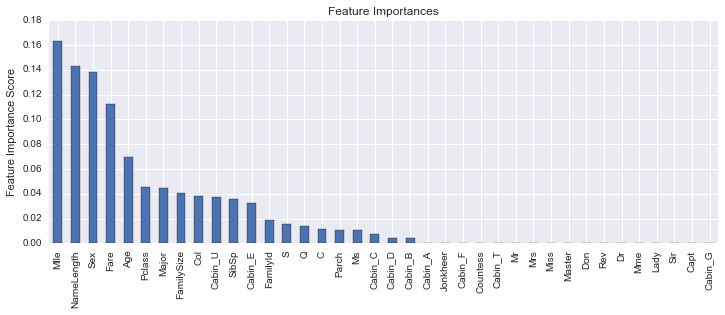

In [1351]:
modelfit(gsearch3.best_estimator_, xtrain, predictors)

In [1352]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
est=GradientBoostingClassifier(learning_rate=.1, n_estimators=30, max_depth=4, max_features='sqrt',random_state=1,min_samples_leaf=9,min_samples_split=2)
gsearch5=GridSearchCV(estimator=est, param_grid=param_test5, n_jobs=4,scoring='roc_auc',cv=5)
gsearch5.fit(xtrain[predictors],ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=9,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=30, presort='auto', random_state=1,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [1353]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.86087, std: 0.02155, params: {'subsample': 0.6},
  mean: 0.86078, std: 0.02888, params: {'subsample': 0.7},
  mean: 0.86571, std: 0.02342, params: {'subsample': 0.75},
  mean: 0.87236, std: 0.02254, params: {'subsample': 0.8},
  mean: 0.86417, std: 0.02490, params: {'subsample': 0.85},
  mean: 0.86272, std: 0.02136, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.8723631398498666)

In [1359]:
model = gsearch4.best_estimator_
predictions = model.predict(titanic_test[predictors])
pred.shape

(418L,)

In [1360]:
model.score(xtest[predictors], ytest)

0.83856502242152464

In [1361]:
model.score?

In [1362]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
submission.to_csv('titanic.csv', index=False)